In [15]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.colors as cols
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [ ]:
os.chdir('TODO')

In [ ]:
# Read data per hexagon and year
df_csv_hex = pd.read_csv('data/forestdata_fulltab_hex_3000ha_reproj.csv',encoding='ANSI')
df_csv_hex.shape

(80038, 92)

In [ ]:
# Data per forest growth region (FGR)
df_csv_fgr = pd.read_csv('data/forestdata_fulltab_forest_districts_reproj.csv', encoding='ANSI')
df_csv_fgr.shape

(574, 92)

In [ ]:
# Size of the FGR
df_csv_area_fgr = pd.read_csv('data/wuchsgebiet_area.csv')
#df_csv_area_fgr

# Chapter 4.1.1. - Forest structure

mean per FGR

In [ ]:
# prepare data
df_csv_fs_mean = df_csv_fgr[[
            'year',
            'poly_name',         # FGR
            'forest_area_ha',
            'agbd_mean',         # AGBD (Mg/ha)
            'cover_mean',        # TCC (%)
            'fdh_normal_mean',   # FHDI
            'rh_95_mean'         # CH (m) 
            ]].copy()
df_csv_fs_mean.shape

(574, 7)

Select the FGR with >50% stocked forest area

In [7]:
# Take stocked forest area (sfa) per FGR from just one year
df_sfa_fgr = df_csv_fs_mean.loc[df_csv_fs_mean['year'] == 2018][[
            'poly_name',
            'forest_area_ha'
        ]].reset_index(drop=True)

# rename the FGR name column to the same name as in the table with the forest structure attributes 
df_csv_area_fgr = df_csv_area_fgr.rename(columns={'bez_wg_bu': 'poly_name'})[['poly_name', 'area_ha']]

# .. to be able to join the dataframes with FGR area and SFA area
df_pSfa_fgr = df_sfa_fgr.set_index('poly_name').join(df_csv_area_fgr.set_index('poly_name'))
df_pSfa_fgr['pSfa'] = df_pSfa_fgr['forest_area_ha']/df_pSfa_fgr['area_ha']
# df_pSfa_fgr

In [8]:
# Find the FGRs with more than 50% SFA, independend of the size of the FGR
# also needed in chapter 4.1.3, FCSD
df_fgr_sel = df_pSfa_fgr.loc[(df_pSfa_fgr['pSfa'] > 0.5)]# & (df_poly_sel['area_ha'] > 10000)]
selection_fgr = df_fgr_sel.index

In [9]:
# Select only the FGRs with more than 50% SFA
df_csv_fs_mean_sel = df_csv_fs_mean[df_csv_fs_mean['poly_name'].isin(selection_fgr)]

In [10]:
# re-arrange the table
df_fs_mean_sel = df_csv_fs_mean_sel.pivot_table(
                    index='poly_name', 
                    columns='year', 
                    values = ['agbd_mean','cover_mean','fdh_normal_mean','rh_95_mean'])
#df_fs_mean_sel

In [ ]:
# Rename FGRs
rename_dict = {
    'Bayerische Alpen': 'Bavarian Alps',
    'Bayerischer Wald': 'Bavarian Forest',
    'Frankenwald, Fichtelgebirge und Steinwald': 'Franconian Forest, Fichtel Mountains and Steinwald',
    'Harz': 'Harz',
    'Hoher Fläming': 'High Flaeming',
    'Hunsrück': 'Hunsrueck',
    'Nördliches hessisches Schiefergebirge': 'Northern Hessian Slate Mountains',
    'Odernwald': 'Odenwald',
    'Pfälzerwald': 'Palatinate Forest',
    'Sauerland': 'Sauerland',
    'Schwarzwald': 'Black Forest',
    'Spessart': 'Spessart',
    'Thüringer Gebirge': 'Thuringian Mountains'
}

df_fs_mean_sel = df_fs_mean_sel.reset_index()

# Replace values in the column
df_fs_mean_sel['poly_name'] = df_fs_mean_sel['poly_name'].replace(rename_dict)
df_fs_mean_sel = df_fs_mean_sel.set_index('poly_name')
df_fs_mean_sel

index   agbd_mean  \
year                                                            2017   
poly_name                                                              
Bavarian Alps                                          0  181.698949   
Bavarian Forest                                        1  203.420078   
Elbsandsteingebirge                                    2  156.122922   
Franconian Forest, Fichtel Mountains and Steinwald     3  198.915294   
Harz                                                   4  206.513425   
High Flaeming                                          5  191.007635   
Hunsrueck                                              6  169.699949   
Northern Hessian Slate Mountains                       7  186.673904   
Odenwald                                               8  195.717218   
Osteifel                                               9  170.137414   
Palatinate Forest                                     10  173.093516   
Sauerland                                             11  177.428041   
Black Forest                                          12  192.399812   
Spessart                                              13  195.075540   
Taunus                                                14  178.951681   
Thuringian Mountains                                  15  202.574034   
Zittauer Gebirge                                      16  207.217091   

                                                                            \
year                                                      2018        2019   
poly_name                                                                    
Bavarian Alps                                       173.103761  183.956255   
Bavarian Forest                                     186.670947  190.776013   
Elbsandsteingebirge                                 198.377360  187.906250   
Franconian Forest, Fichtel Mountains and Steinwald  183.755902  186.942996   
Harz                                                187.089899  173.447228   
High Flaeming                                       154.224880  150.944565   
Hunsrueck                                           186.936204  185.313558   
Northern Hessian Slate Mountains                    189.550156  189.231718   
Odenwald                                            183.435718  191.903295   
Osteifel                                            183.362246  179.218715   
Palatinate Forest                                   187.458505  189.757062   
Sauerland                                           189.683042  179.988666   
Black Forest                                        185.633497  191.668100   
Spessart                                            183.874803  194.942612   
Taunus                                              188.621114  189.560815   
Thuringian Mountains                                198.902992  194.374434   
Zittauer Gebirge                                    197.277376  188.500223   

                                                                            \
year                                                      2020        2021   
poly_name                                                                    
Bavarian Alps                                       168.822050  169.396714   
Bavarian Forest                                     189.743538  182.572596   
Elbsandsteingebirge                                 187.907583  179.196466   
Franconian Forest, Fichtel Mountains and Steinwald  182.578226  185.856753   
Harz                                                158.324105  143.483223   
High Flaeming                                       156.549706  153.005265   
Hunsrueck                                           182.035984  169.231248   
Northern Hessian Slate Mountains                    181.468801  161.079725   
Odenwald                                            184.283344  180.548061   
Osteifel                                            179.057878  164.489588   
Palatinate Forest                  

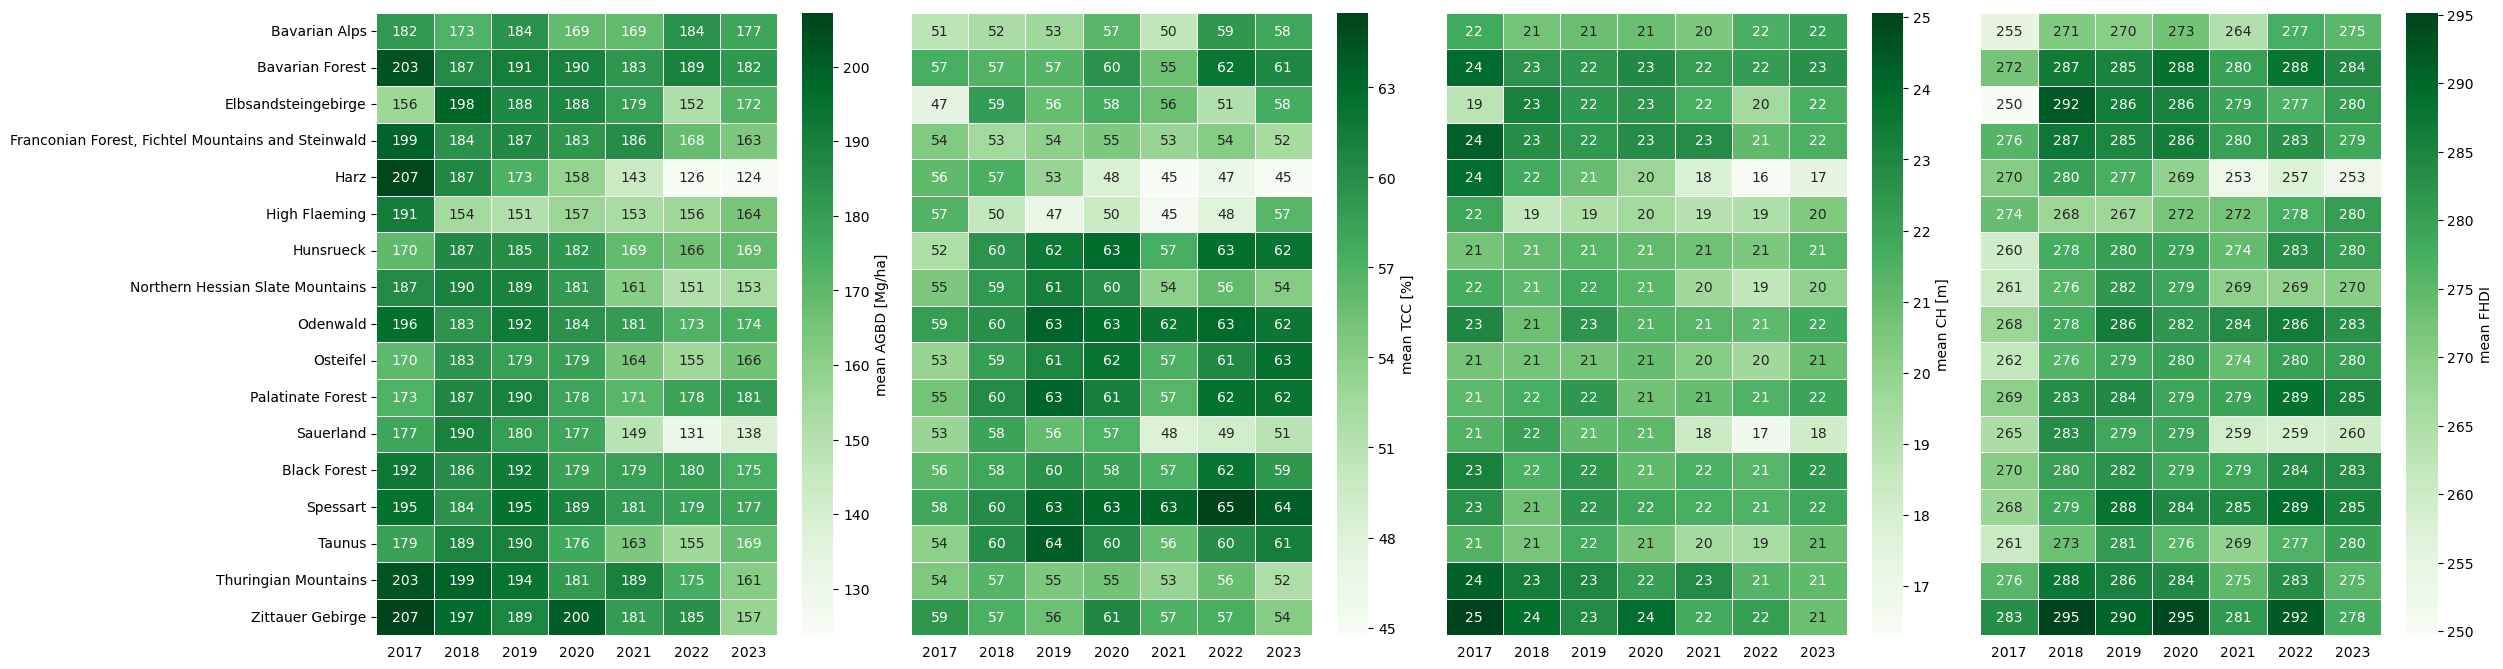

In [ ]:
# plot
cell_width = 0.9  
cell_height = 0.4  
num_rows = len(df_fs_mean_sel["agbd_mean"].index)
num_cols = sum(len(df_fs_mean_sel[var].columns) for var in ["agbd_mean", "cover_mean", "rh_95_mean", "fdh_normal_mean"])
figsize = (cell_width * num_cols, cell_height * num_rows) 

# Create a 1x4 grid for the heatmaps
fig, axes = plt.subplots(1, 4, figsize=figsize)

# Plot 1
ax1 = axes[0]
sns.heatmap(
    df_fs_mean_sel["agbd_mean"], 
    cmap="Greens", 
    annot=True,
    fmt=".0f", 
    linewidths=.5,
    cbar_kws={'label': 'mean AGBD [Mg/ha]'},
    ax=ax1
)
cbar = ax1.collections[0].colorbar
cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.tick_params(left=True, bottom=False)

# Plot 2 
ax2 = axes[1]
sns.heatmap(
    df_fs_mean_sel["cover_mean"], 
    cmap="Greens", 
    annot=True,
    fmt=".0f", 
    linewidths=.5,
    cbar_kws={'label': 'mean TCC [%]'},
    ax=ax2
)
cbar = ax2.collections[0].colorbar
cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_xlabel("")
ax2.set_ylabel("")  
ax2.tick_params(left=False, bottom=False)

# Plot 3 
ax3 = axes[2]
sns.heatmap(
    df_fs_mean_sel["rh_95_mean"], 
    cmap="Greens", 
    annot=True,
    fmt=".0f", 
    linewidths=.5,
    cbar_kws={'label': 'mean CH [m]'},
    ax=ax3
)
cbar = ax3.collections[0].colorbar
cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax3.set_xlabel("")
ax3.set_ylabel("") 
ax3.tick_params(left=False, bottom=False)

# Plot 4 
ax4 = axes[3]
sns.heatmap(
    df_fs_mean_sel["fdh_normal_mean"], 
    cmap="Greens", 
    annot=True,
    fmt=".0f", 
    linewidths=.5,
    cbar_kws={'label': 'mean FHDI'},
    ax=ax4
)
cbar = ax4.collections[0].colorbar
cbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax4.set_xlabel("")
ax4.set_ylabel("")  
ax4.tick_params(left=False, bottom=False)

# Remove the Y-tick labels (row names) for the second, third and fourth plots
for ax in [ax2, ax3, ax4]:
    ax.set_yticklabels([]) 

plt.tight_layout()
plt.show()

## Chapter 4.1.2. - Forest Canopy Cover Loss

FCCL per year per federal, based on hexagons

In [70]:
# Prepare data
df_fccl_fed = df_csv_hex[[
            'year', 
            'id', # Hex id
            'federal',
            'forest_area_ha', # forest area in ha per hexagon
            'fccl_ges_ha',    # FCCL per hexagon per year in ha
            'fccl_ges_cum_ha' # Cumulated FCCL per hexagon per year in ha
            ]].copy()
df_fccl_fed.shape

(80038, 6)

In [71]:
df_fccl_fed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80038 entries, 0 to 80037
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             80038 non-null  int64  
 1   id               80038 non-null  int64  
 2   federal          80038 non-null  object 
 3   forest_area_ha   80038 non-null  float64
 4   fccl_ges_ha      80038 non-null  float64
 5   fccl_ges_cum_ha  80038 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 3.7+ MB


In [72]:
# Remove NA Values - not necessary here, all non-null values
# df_fccl_fed = df_fccl_fed.dropna(axis=0)
# df_fccl_fed.shape

In [73]:
# group by federal and year
df_fccl_fed_g = df_fccl_fed.groupby(['federal', 'year']).sum()

df_fccl_fed_g['pFccl'] = df_fccl_fed_g['fccl_ges_ha'] / df_fccl_fed_g['forest_area_ha']*100       
df_fccl_fed_g['pFcclCum'] = df_fccl_fed_g['fccl_ges_cum_ha'] / df_fccl_fed_g['forest_area_ha']*100
df_fccl_fed_g

id  forest_area_ha  fccl_ges_ha  \
federal            year                                         
Baden-WÃ¼rttemberg 2017  4224096      1421089.48      1870.04   
                   2018  4224096      1421089.48      7961.31   
                   2019  4224096      1421089.48      9009.78   
                   2020  4224096      1421089.48     13397.96   
                   2021  4224096      1421089.48      7183.63   
...                          ...             ...          ...   
ThÃ¼ringen         2019  3029194       449936.71      5937.57   
                   2020  3029194       449936.71      9110.47   
                   2021  3029194       449936.71      8643.04   
                   2022  3029194       449936.71     11956.35   
                   2023  3029194       449936.71     17265.36   

                         fccl_ges_cum_ha     pFccl   pFcclCum  
federal            year                                        
Baden-WÃ¼rttemberg 2017          1870.04  0.131592   0.131592  
                   2018          9831.35  0.560226   0.691818  
                   2019         18841.13  0.634005   1.325823  
                   2020         32239.09  0.942795   2.268618  
                   2021         39422.72  0.505502   2.774119  
...                                  ...       ...        ...  
ThÃ¼ringen         2019         10852.63  1.319646   2.412035  
                   2020         19963.10  2.024834   4.436868  
                   2021         28606.14  1.920946   6.357814  
                   2022         40562.49  2.657340   9.015155  
                   2023         57827.85  3.837286  12.852441  

[112 rows x 6 columns]

In [74]:
#pd.DataFrame(data=df_fccl_fed_g['pFccl']).unstack(level=1).head(5)

In [ ]:
# Rename federal states
rename_dict = {
    'Bremen': 'Bremen',
    'Hamburg': 'Hamburg',
    'Berlin': 'Berlin',
    'Saarland': 'Saarland',
    'Schleswig-Holstein	': 'Schleswig-Holstein',
    'Sachsen-Anhalt': 'Saxony-Anhalt',
    'Sachsen': 'Saxony',
    'ThÃ¼ringen': 'Thuringia',
    'Mecklenburg-Vorpommern': 'Mecklemburg-Vorpommern',
    'Rheinland-Pfalz': 'Rhineland-Palatinate',
    'Nordrhein-Westfalen': 'North Rhine-Westphalia',
    'Hessen': 'Hesse',
    'Niedersachsen	': 'Lower Saxony',
    'Brandenburg': 'Brandenburg',
    'Baden-WÃ¼rttemberg': 'Baden-Wuettemberg',
    'Bayern': 'Bavaria'
}

df_fccl_fed_g = df_fccl_fed_g.reset_index()

# Replace values in the column
df_fccl_fed_g['federal'] = df_fccl_fed_g['federal'].replace(rename_dict)
df_fccl_fed_g

,federal,year,id,forest_area_ha,fccl_ges_ha,fccl_ges_cum_ha,pFccl,pFcclCum
0,Baden-Wuettemberg,2017,4224096,1421089.48,1870.04,1870.04,0.131592,0.131592
1,Baden-Wuettemberg,2018,4224096,1421089.48,7961.31,9831.35,0.560226,0.691818
2,Baden-Wuettemberg,2019,4224096,1421089.48,9009.78,18841.13,0.634005,1.325823
3,Baden-Wuettemberg,2020,4224096,1421089.48,13397.96,32239.09,0.942795,2.268618
4,Baden-Wuettemberg,2021,4224096,1421089.48,7183.63,39422.72,0.505502,2.774119
...,...,...,...,...,...,...,...,...
107,Thuringia,2019,3029194,449936.71,5937.57,10852.63,1.319646,2.412035
108,Thuringia,2020,3029194,449936.71,9110.47,19963.10,2.024834,4.436868
109,Thuringia,2021,3029194,449936.71,8643.04,28606.14,1.920946,6.357814
110,Thuringia,2022,3029194,449936.71,11956.35,40562.49,2.657340,9.015155


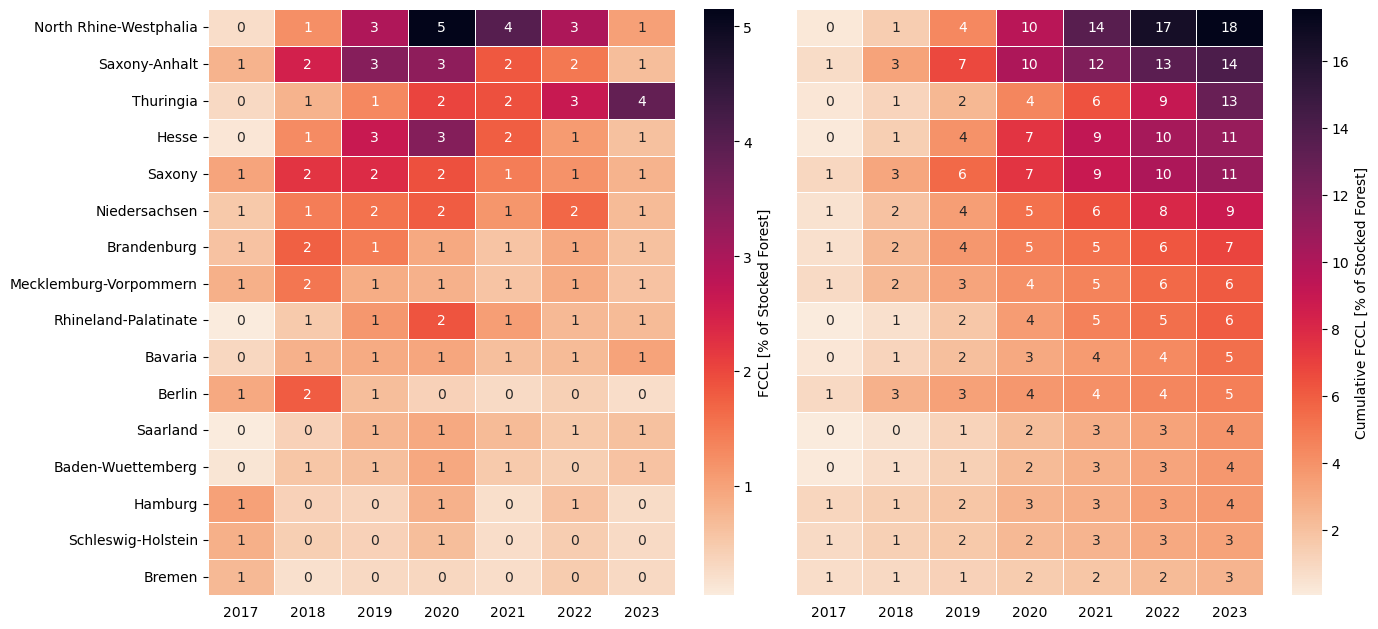

In [83]:
# Unstack multiindex
df_fccl_fed_g = df_fccl_fed_g.set_index(['federal', 'year'])
pFccl = df_fccl_fed_g["pFccl"].unstack()
pFcclCum = df_fccl_fed_g["pFcclCum"].unstack()

# Sort by cumulative value in 2023
sorted_index = pFcclCum[2023].sort_values(ascending=False).index
pFccl = pFccl.loc[sorted_index]
pFcclCum = pFcclCum.loc[sorted_index]

# Now you can safely use .columns
num_rows = len(pFccl.index)
num_cols = len(pFccl.columns)
figsize = (1 * num_cols * 2, 0.4 * num_rows)

fig, axes = plt.subplots(1, 2, figsize=figsize)

# Plot 1: FCCL
sns.heatmap(pFccl, cmap="rocket_r", annot=True, fmt=".0f", linewidths=.5,
            cbar_kws={'label': 'FCCL [% of Stocked Forest]'}, ax=axes[0])
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].tick_params(left=True, bottom=False)

# Plot 2: Cumulative FCCL
sns.heatmap(pFcclCum, cmap="rocket_r", annot=True, fmt=".0f", linewidths=.5,
            cbar_kws={'label': 'Cumulative FCCL [% of Stocked Forest]'}, ax=axes[1])
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(left=False, bottom=False)
axes[1].set_yticklabels([])

plt.tight_layout()
plt.show()


# Chapter 4.1.3 - Fractional Cover of Standing Deadwood

FCSD per FGR

In [ ]:
# prepare data
df_csv_fcsd_mean = df_csv_fgr[[
            'year',
            'poly_name', # FGR
            'fcsd_mean', # fractional cover of standing deadwood (%)
            ]].copy()
df_csv_fcsd_mean.shape

(574, 3)

In [85]:
df_csv_fcsd_mean.describe()

,year,fcsd_mean
count,574.000000,328.000000
mean,2020.000000,1693.191263
std,2.001744,461.476665
min,2017.000000,968.871847
25%,2018.000000,1364.136655
50%,2020.000000,1564.883102
75%,2022.000000,1918.585283
max,2023.000000,3712.863373


In [86]:
# the fcsd values have to be corrected, divide by 100
df_csv_fcsd_mean['fcsd_mean'] = df_csv_fcsd_mean['fcsd_mean']/100

In [87]:
# Select only the FGRs with more than 50% SFA
df_csv_fcsd_mean_sel = df_csv_fcsd_mean[df_csv_fcsd_mean['poly_name'].isin(selection_fgr)]

In [88]:
# rearrange tables
df_fcsd_mean_sel = df_csv_fcsd_mean_sel.pivot_table(
                    index='poly_name', 
                    columns='year', 
                    values = ['fcsd_mean'])
# df_fcsd_mean_sel

In [ ]:
# Rename FGRs
rename_dict = {
    'Bayerische Alpen': 'Bavarian Alps',
    'Bayerischer Wald': 'Bavarian Forest',
    'Frankenwald, Fichtelgebirge und Steinwald': 'Franconian Forest, Fichtel Mountains and Steinwald',
    'Harz': 'Harz',
    'Hoher Fläming': 'High Flaeming',
    'Hunsrück': 'Hunsrueck',
    'Nördliches hessisches Schiefergebirge': 'Northern Hessian Slate Mountains',
    'Odernwald': 'Odenwald',
    'Pfälzerwald': 'Palatinate Forest',
    'Sauerland': 'Sauerland',
    'Schwarzwald': 'Black Forest',
    'Spessart': 'Spessart',
    'Thüringer Gebirge': 'Thuringian Mountains'
}

df_fcsd_mean_sel = df_fcsd_mean_sel.reset_index()

# Replace values in the column
df_fcsd_mean_sel['poly_name'] = df_fcsd_mean_sel['poly_name'].replace(rename_dict)
df_fcsd_mean_sel = df_fcsd_mean_sel.set_index('poly_name')
df_fcsd_mean_sel

fcsd_mean             \
year                                                     2018       2019   
poly_name                                                                  
Bavarian Alps                                       14.671070  13.812695   
Bavarian Forest                                     14.462104  16.225526   
Elbsandsteingebirge                                 23.142970  23.924399   
Franconian Forest, Fichtel Mountains and Steinwald  21.654975  21.358612   
Harz                                                18.600639  23.870447   
High Flaeming                                       28.359631  34.986744   
Hunsrueck                                           13.377029  13.643368   
Northern Hessian Slate Mountains                    13.882851  13.765334   
Odenwald                                            13.296213  13.677096   
Osteifel                                            14.556830  16.947650   
Palatinate Forest                                   14.127928  15.810671   
Sauerland                                           14.069142  20.539368   
Black Forest                                        14.253355  15.113874   
Spessart                                            13.375057  14.191957   
Taunus                                              11.444877  13.367035   
Thuringian Mountains                                20.577757  21.469963   
Zittauer Gebirge                                    16.969669  24.485598   

                                                                          
year                                                     2020       2021  
poly_name                                                                 
Bavarian Alps                                       13.556857  13.547922  
Bavarian Forest                                     13.407945  14.359599  
Elbsandsteingebirge                                 20.899625  22.528370  
Franconian Forest, Fichtel Mountains and Steinwald  19.238261  16.953149  
Harz                                                27.293052  22.529372  
High Flaeming                                       23.941417  13.963373  
Hunsrueck                                           17.675530  14.333323  
Northern Hessian Slate Mountains                    18.855819  16.220768  
Odenwald                                            14.860719  11.603031  
Osteifel                                            19.322174  14.841685  
Palatinate Forest                                   17.679347  14.533749  
Sauerland                                           24.556601  20.741827  
Black Forest                                        16.718076  13.208666  
Spessart                                            14.633930  11.213389  
Taunus                                              17.272270  14.578265  
Thuringian Mountains                                20.176574  15.701895  
Zittauer Gebirge                                    19.350885  18.833803

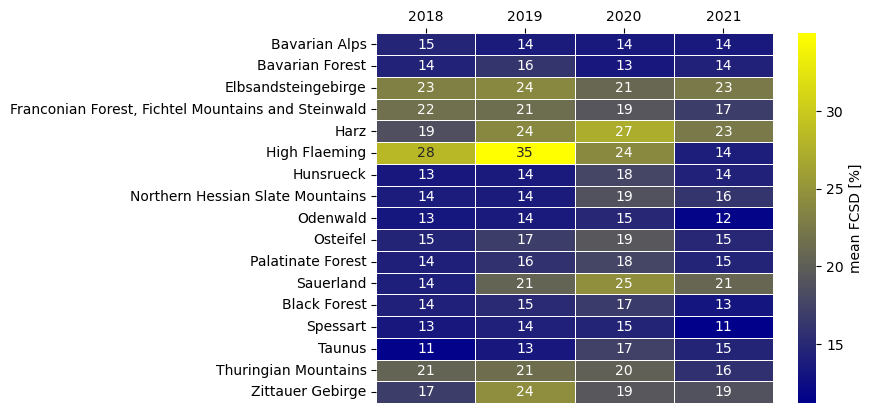

In [ ]:
# plot
colors = ["darkblue", "yellow"]
custom_cmap = cols.LinearSegmentedColormap.from_list("custom_palette", colors)

ax = sns.heatmap(df_fcsd_mean_sel["fcsd_mean"], annot=True, linewidths=.5, 
                 cmap=custom_cmap, fmt=".0f", cbar_kws={'label': 'mean FCSD [%]'})
ax.set(xlabel="", ylabel="") 
ax.xaxis.tick_top()